In [1]:
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import dtale
import pprint
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df1 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
df.head(12)

,Name,combi_model,confidence average @0.0.validation accuracy @0.0:,confidence average @0.5.percentage labelled @0.5:,confidence average @0.55.percentage labelled @0.55:,confidence average @0.6.percentage labelled @0.6:,confidence average @0.65.percentage labelled @0.65:,confidence average @0.7.percentage labelled @0.7:,confidence average @0.75.percentage labelled @0.75:,confidence average @0.8.percentage labelled @0.8:,...,confidence average @0.98.validation accuracy @0.98:,confidence average @0.99.validation accuracy @0.99:,confidence average @0.992.validation accuracy @0.992:,confidence average @0.994.validation accuracy @0.994:,confidence average @0.995.validation accuracy @0.995:,confidence average @0.996.validation accuracy @0.996:,confidence average @0.997.validation accuracy @0.997:,confidence average @0.998.validation accuracy @0.998:,confidence average @0.999.validation accuracy @0.999:,confidence average @0.0.percentage labelled @0.0:
0,"""real_third""",nn,0.833807,0.993853,0.982360,0.970390,0.957780,0.943590,0.927453,0.909437,...,0.912933,0.925787,0.928783,0.932267,0.935180,0.938783,0.942367,0.946693,0.955560,1.0
1,"""best""",nn,0.834000,0.993333,0.979667,0.966000,0.953333,0.939667,0.925000,0.906000,...,0.920333,0.933333,0.937667,0.943333,0.946000,0.949667,0.953667,0.960000,0.968333,1.0
2,"""second""",nn,0.832000,0.993333,0.980667,0.967667,0.953000,0.938000,0.921667,0.903333,...,0.920000,0.932333,0.936333,0.941333,0.944333,0.948000,0.952333,0.957667,0.966000,1.0
3,"""third""",nn,0.831333,0.993667,0.981000,0.966667,0.952667,0.937333,0.920667,0.902000,...,0.921667,0.934333,0.938333,0.943333,0.946667,0.949667,0.954667,0.959667,0.967000,1.0
0,"""real_third""",xgboost,0.835247,0.997267,0.990680,0.984697,0.978347,0.971227,0.963530,0.954813,...,0.882677,0.890210,0.892107,0.895220,0.896810,0.899593,0.903207,0.907913,0.915277,1.0
1,"""best""",xgboost,0.834667,0.996667,0.990333,0.984000,0.977000,0.970333,0.962333,0.953000,...,0.885000,0.893667,0.896000,0.899333,0.901667,0.904000,0.907333,0.912333,0.920667,1.0
2,"""second""",xgboost,0.833667,0.997000,0.990667,0.984000,0.976333,0.968667,0.960333,0.951000,...,0.886667,0.895333,0.898000,0.901667,0.904333,0.907333,0.910333,0.915667,0.922333,1.0
3,"""third""",xgboost,0.834667,0.997000,0.990667,0.984000,0.976667,0.969333,0.960333,0.950333,...,0.885667,0.894000,0.896667,0.899333,0.902000,0.905000,0.908333,0.913333,0.920667,1.0
0,"""real_third""",linear,0.833993,0.985000,0.971830,0.958843,0.946210,0.933227,0.918317,0.898590,...,0.939893,0.954217,0.957413,0.963120,0.966497,0.970320,0.974443,0.979887,0.987603,1.0
1,"""best""",linear,0.831000,0.984000,0.972000,0.959333,0.945667,0.931000,0.914000,0.895000,...,0.945000,0.958000,0.962667,0.967333,0.969667,0.973000,0.977333,0.980000,0.987000,1.0


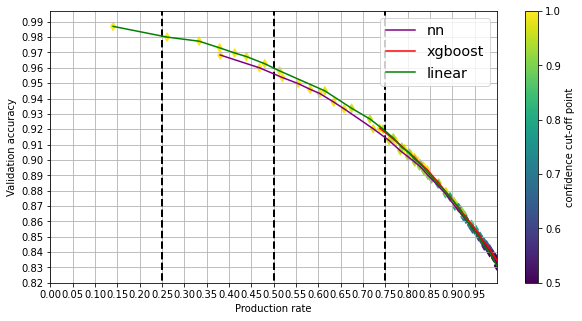

In [47]:
df1 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"] # best minimal bestes # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second minimal bestes besonders später
#df = df[df.combi_model=="linear"] # second minimal bestes

df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
df = df[df['Name'] != '"third"'] # fliegt raus weil nicht in top 3
#df = df[df['Name'] == '"real_third"']

names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (15,10))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    plt.scatter(x=perc, y=acc, c=confidences, vmin=0.5, vmax=1.0, marker = "d")#matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = f"{combi_mod}")
cbar = plt.colorbar()
cbar.set_label('confidence cut-off point')

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((np.round(np.min(accuracies)-0.01, decimals = 2), np.max(accuracies)+0.01))
plt.grid()
plt.yticks(np.arange(np.round(np.min(accuracies)-0.01, decimals = 2), np.max(accuracies)+0.01, step=0.01))
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlabel("Production rate", fontsize="x-large")
plt.ylabel("Validation accuracy", fontsize="x-large")
plt.legend(fontsize="x-large")
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('ohne_8_conf.png')

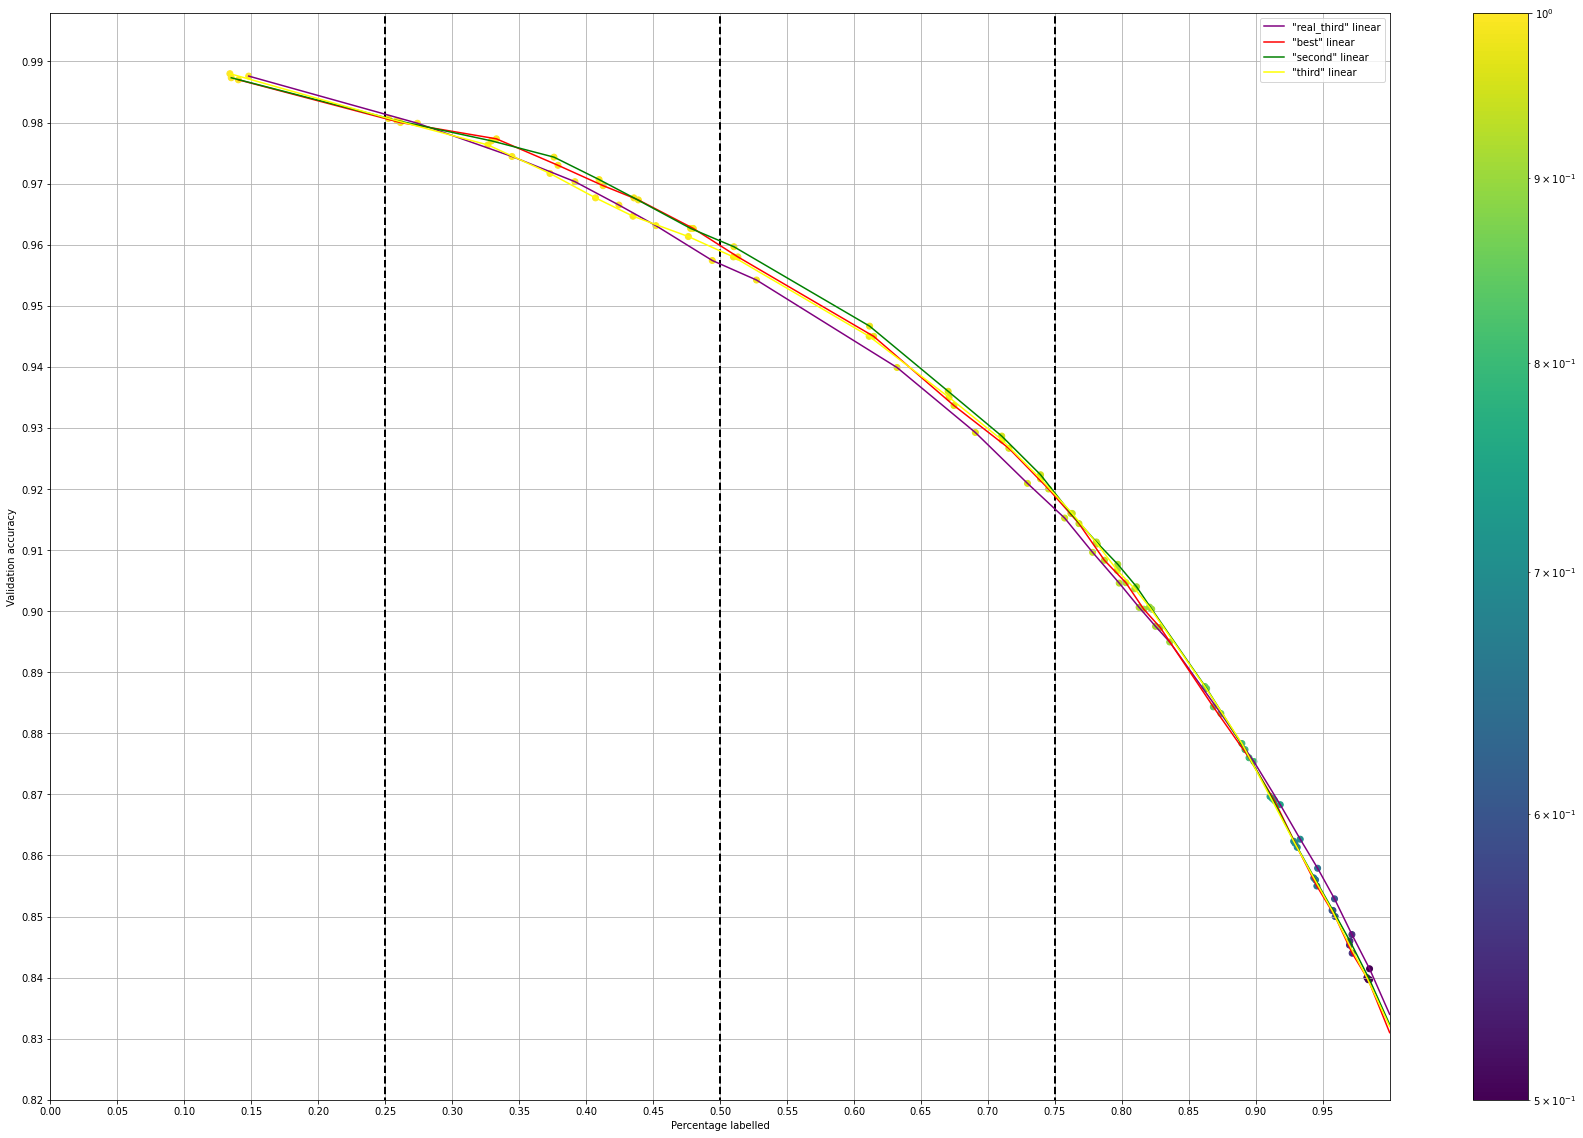

In [6]:
df1 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
df = df[df.combi_model=="linear"]

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']




#f"confidence average @{i}.percentage labelled @{i}:" 
#display(df["confidence average @0.5.percentage labelled @0.5: "])
names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = f"{name} {combi_mod}")
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((np.round(np.min(accuracies)-0.01, decimals = 2), np.max(accuracies)+0.01))
plt.grid()
plt.yticks(np.arange(np.round(np.min(accuracies)-0.01, decimals = 2), np.max(accuracies)+0.01, step=0.01))
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()

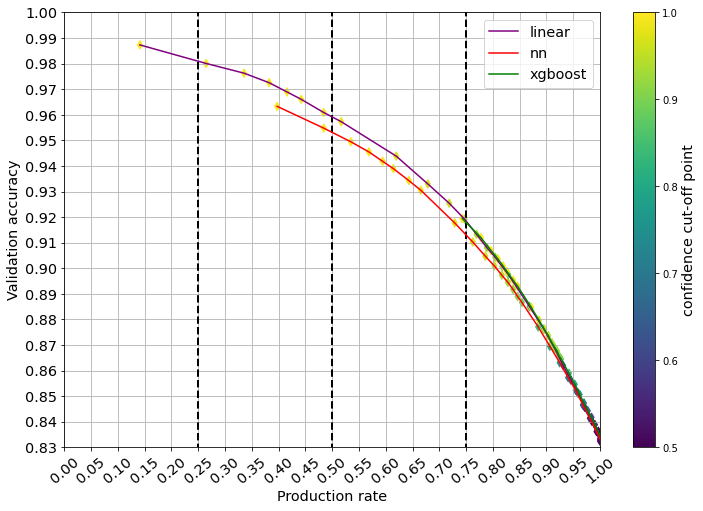

In [69]:
df1 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"third"']

df = df.groupby(["combi_model"], as_index= False)[['confidence average @0.0.validation accuracy @0.0: ',
       'confidence average @0.5.percentage labelled @0.5: ',
       'confidence average @0.55.percentage labelled @0.55: ',
       'confidence average @0.6.percentage labelled @0.6: ',
       'confidence average @0.65.percentage labelled @0.65: ',
       'confidence average @0.7.percentage labelled @0.7: ',
       'confidence average @0.75.percentage labelled @0.75: ',
       'confidence average @0.8.percentage labelled @0.8: ',
       'confidence average @0.85.percentage labelled @0.85: ',
       'confidence average @0.9.percentage labelled @0.9: ',
       'confidence average @0.91.percentage labelled @0.91: ',
       'confidence average @0.92.percentage labelled @0.92: ',
       'confidence average @0.93.percentage labelled @0.93: ',
       'confidence average @0.94.percentage labelled @0.94: ',
       'confidence average @0.95.percentage labelled @0.95: ',
       'confidence average @0.96.percentage labelled @0.96: ',
       'confidence average @0.97.percentage labelled @0.97: ',
       'confidence average @0.98.percentage labelled @0.98: ',
       'confidence average @0.99.percentage labelled @0.99: ',
       'confidence average @0.992.percentage labelled @0.992: ',
       'confidence average @0.994.percentage labelled @0.994: ',
       'confidence average @0.995.percentage labelled @0.995: ',
       'confidence average @0.996.percentage labelled @0.996: ',
       'confidence average @0.997.percentage labelled @0.997: ',
       'confidence average @0.998.percentage labelled @0.998: ',
       'confidence average @0.999.percentage labelled @0.999: ',
       'confidence average @0.5.validation accuracy @0.5: ',
       'confidence average @0.55.validation accuracy @0.55: ',
       'confidence average @0.6.validation accuracy @0.6: ',
       'confidence average @0.65.validation accuracy @0.65: ',
       'confidence average @0.7.validation accuracy @0.7: ',
       'confidence average @0.75.validation accuracy @0.75: ',
       'confidence average @0.8.validation accuracy @0.8: ',
       'confidence average @0.85.validation accuracy @0.85: ',
       'confidence average @0.9.validation accuracy @0.9: ',
       'confidence average @0.91.validation accuracy @0.91: ',
       'confidence average @0.92.validation accuracy @0.92: ',
       'confidence average @0.93.validation accuracy @0.93: ',
       'confidence average @0.94.validation accuracy @0.94: ',
       'confidence average @0.95.validation accuracy @0.95: ',
       'confidence average @0.96.validation accuracy @0.96: ',
       'confidence average @0.97.validation accuracy @0.97: ',
       'confidence average @0.98.validation accuracy @0.98: ',
       'confidence average @0.99.validation accuracy @0.99: ',
       'confidence average @0.992.validation accuracy @0.992: ',
       'confidence average @0.994.validation accuracy @0.994: ',
       'confidence average @0.995.validation accuracy @0.995: ',
       'confidence average @0.996.validation accuracy @0.996: ',
       'confidence average @0.997.validation accuracy @0.997: ',
       'confidence average @0.998.validation accuracy @0.998: ',
       'confidence average @0.999.validation accuracy @0.999: ',
       'confidence average @0.0.percentage labelled @0.0: ']].mean()

#df = df[df.combi_model=="nn"] # best minimal bestes # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second minimal bestes besonders später
#df = df[df.combi_model=="linear"] # second minimal bestes

#df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] != '"third"'] # fliegt raus weil nicht in top 3
#df = df[df['Name'] == '"real_third"']

#names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (12,8))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    plt.scatter(x=perc, y=acc, c=confidences, vmin=0.5, vmax=1.0, marker = "d")#matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = f"{combi_mod}")
cbar = plt.colorbar()
cbar.set_label('confidence cut-off point', fontsize="x-large")

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.83, 1.0))
plt.grid()
plt.yticks(np.arange(0.83, 1.0, step=0.01),fontsize="x-large")
plt.xticks(np.arange(0, 1.025, step=0.05),fontsize="x-large", rotation=40)
plt.xlabel("Production rate",fontsize="x-large")
plt.ylabel("Validation accuracy",fontsize="x-large")
plt.legend(fontsize="x-large")
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('ohne_8_conf.png')

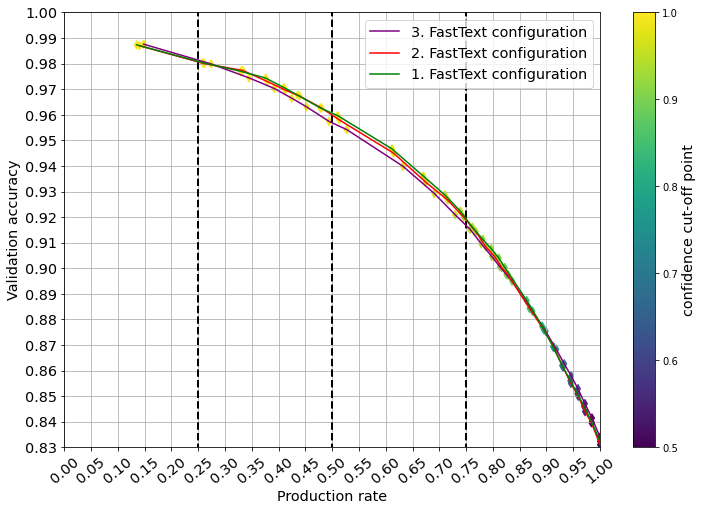

In [73]:
df1 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"third"']



#df = df[df.combi_model=="nn"] # best minimal bestes # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second minimal bestes besonders später
df = df[df.combi_model=="linear"] # second minimal bestes

#df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] != '"third"'] # fliegt raus weil nicht in top 3
#df = df[df['Name'] == '"real_third"']

#names = df.Name.values
names = ["3. FastText configuration", "2. FastText configuration", "1. FastText configuration"]
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (12,8))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    plt.scatter(x=perc, y=acc, c=confidences, vmin=0.5, vmax=1.0, marker = "d")#matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = f"{name}")
cbar = plt.colorbar()
cbar.set_label('confidence cut-off point', fontsize="x-large")

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.83, 1.0))
plt.grid()
plt.yticks(np.arange(0.83, 1.0, step=0.01),fontsize="x-large")
plt.xticks(np.arange(0, 1.025, step=0.05),fontsize="x-large", rotation=40)
plt.xlabel("Production rate",fontsize="x-large")
plt.ylabel("Validation accuracy",fontsize="x-large")
plt.legend(fontsize="x-large")
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
#plt.show()
plt.savefig('ohne_8_linear.png')

In [65]:
df1 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"third"']

df = df.groupby(["combi_model"], as_index= False)[['confidence average @0.0.validation accuracy @0.0: ',
       'confidence average @0.5.percentage labelled @0.5: ',
       'confidence average @0.55.percentage labelled @0.55: ',
       'confidence average @0.6.percentage labelled @0.6: ',
       'confidence average @0.65.percentage labelled @0.65: ',
       'confidence average @0.7.percentage labelled @0.7: ',
       'confidence average @0.75.percentage labelled @0.75: ',
       'confidence average @0.8.percentage labelled @0.8: ',
       'confidence average @0.85.percentage labelled @0.85: ',
       'confidence average @0.9.percentage labelled @0.9: ',
       'confidence average @0.91.percentage labelled @0.91: ',
       'confidence average @0.92.percentage labelled @0.92: ',
       'confidence average @0.93.percentage labelled @0.93: ',
       'confidence average @0.94.percentage labelled @0.94: ',
       'confidence average @0.95.percentage labelled @0.95: ',
       'confidence average @0.96.percentage labelled @0.96: ',
       'confidence average @0.97.percentage labelled @0.97: ',
       'confidence average @0.98.percentage labelled @0.98: ',
       'confidence average @0.99.percentage labelled @0.99: ',
       'confidence average @0.992.percentage labelled @0.992: ',
       'confidence average @0.994.percentage labelled @0.994: ',
       'confidence average @0.995.percentage labelled @0.995: ',
       'confidence average @0.996.percentage labelled @0.996: ',
       'confidence average @0.997.percentage labelled @0.997: ',
       'confidence average @0.998.percentage labelled @0.998: ',
       'confidence average @0.999.percentage labelled @0.999: ',
       'confidence average @0.5.validation accuracy @0.5: ',
       'confidence average @0.55.validation accuracy @0.55: ',
       'confidence average @0.6.validation accuracy @0.6: ',
       'confidence average @0.65.validation accuracy @0.65: ',
       'confidence average @0.7.validation accuracy @0.7: ',
       'confidence average @0.75.validation accuracy @0.75: ',
       'confidence average @0.8.validation accuracy @0.8: ',
       'confidence average @0.85.validation accuracy @0.85: ',
       'confidence average @0.9.validation accuracy @0.9: ',
       'confidence average @0.91.validation accuracy @0.91: ',
       'confidence average @0.92.validation accuracy @0.92: ',
       'confidence average @0.93.validation accuracy @0.93: ',
       'confidence average @0.94.validation accuracy @0.94: ',
       'confidence average @0.95.validation accuracy @0.95: ',
       'confidence average @0.96.validation accuracy @0.96: ',
       'confidence average @0.97.validation accuracy @0.97: ',
       'confidence average @0.98.validation accuracy @0.98: ',
       'confidence average @0.99.validation accuracy @0.99: ',
       'confidence average @0.992.validation accuracy @0.992: ',
       'confidence average @0.994.validation accuracy @0.994: ',
       'confidence average @0.995.validation accuracy @0.995: ',
       'confidence average @0.996.validation accuracy @0.996: ',
       'confidence average @0.997.validation accuracy @0.997: ',
       'confidence average @0.998.validation accuracy @0.998: ',
       'confidence average @0.999.validation accuracy @0.999: ',
       'confidence average @0.0.percentage labelled @0.0: ']].mean()

#df = df[df.combi_model=="nn"] # best minimal bestes # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second minimal bestes besonders später
#df = df[df.combi_model=="linear"] # second minimal bestes

#df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] != '"third"'] # fliegt raus weil nicht in top 3
#df = df[df['Name'] == '"real_third"']

#names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


d= pd.DataFrame(index= confidences)
for accu,perce, name in zip(accuracies,percentages, combi_model):
    b= pd.DataFrame(accu, index= confidences)
    c= pd.DataFrame(perce, index= confidences)
    d.insert(0, f"{name} accuracies", b)
    d.insert(0, f"{name} percentages", c)
    
    
d.head(50)

,xgboost percentages,xgboost accuracies,nn percentages,nn accuracies,linear percentages,linear accuracies
0.000,1.000000,0.834527,1.000000,0.833269,1.000000,0.832442
0.500,0.996978,0.836259,0.993507,0.836201,0.984667,0.840261
0.550,0.990560,0.838864,0.980898,0.841376,0.971388,0.845687
0.600,0.984232,0.841722,0.968019,0.846571,0.958614,0.851300
0.650,0.977227,0.844289,0.954704,0.852321,0.945514,0.856304
0.700,0.970076,0.847311,0.940419,0.857287,0.931187,0.862000
0.750,0.962066,0.850684,0.924707,0.863130,0.914883,0.868883
0.800,0.952938,0.854627,0.906257,0.869553,0.895197,0.876240
0.850,0.942120,0.858927,0.884557,0.877100,0.868544,0.884969
0.900,0.927340,0.864597,0.854243,0.886643,0.828919,0.897541


In [76]:
df1 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"third"']


#df = df[df.combi_model=="nn"] # best minimal bestes # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second minimal bestes besonders später
df = df[df.combi_model=="linear"] # second minimal bestes

#df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] != '"third"'] # fliegt raus weil nicht in top 3
#df = df[df['Name'] == '"real_third"']

#print(df.Name.values)
names = ["3. FastText configuration", "2. FastText configuration", "1. FastText configuration"]
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


d= pd.DataFrame(index= confidences)
for accu,perce, name in zip(accuracies,percentages, names):
    b= pd.DataFrame(accu, index= confidences)
    c= pd.DataFrame(perce, index= confidences)
    d.insert(0, f"{name} accuracies", b)
    d.insert(0, f"{name} percentages", c)
    
    
d.head(50)

,1. FastText configuration percentages,1. FastText configuration accuracies,2. FastText configuration percentages,2. FastText configuration accuracies,3. FastText configuration percentages,3. FastText configuration accuracies
0.000,1.000000,0.832333,1.000000,0.831000,1.000000,0.833993
0.500,0.985000,0.839667,0.984000,0.839667,0.985000,0.841450
0.550,0.970333,0.846000,0.972000,0.844000,0.971830,0.847060
0.600,0.957667,0.851000,0.959333,0.850000,0.958843,0.852900
0.650,0.944667,0.856000,0.945667,0.855000,0.946210,0.857913
0.700,0.929333,0.862000,0.931000,0.861333,0.933227,0.862667
0.750,0.912333,0.869333,0.914000,0.869000,0.918317,0.868317
0.800,0.892000,0.877333,0.895000,0.876000,0.898590,0.875387
0.850,0.863333,0.887333,0.868333,0.884333,0.873967,0.883240
0.900,0.822333,0.900333,0.828667,0.897333,0.835757,0.894957


In [71]:
df1 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

df = df[df['Name'] != '"third"']


#df = df[df.combi_model=="nn"] # best minimal bestes # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second minimal bestes besonders später
df = df[df.combi_model=="linear"] # second minimal bestes

#df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] != '"third"'] # fliegt raus weil nicht in top 3
#df = df[df['Name'] == '"real_third"']

names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = 0.0
        else:
            max = accuracies[row][value]


for min in [0, 0.25,0.5,0.75,0.9]:
    result = []
    for i in range(len(accuracies)):
        perce = np.flip(percentages[i])
        #print(perce)
        accu = np.flip(accuracies[i])
        #print(accu)        
        z = np.interp(np.arange(min,1,step=0.01), perce, accu, left= 0.0).mean()
        #print(z)
        result.append(z)
    print(min)
    print(result)
    print(names)

0
[0.7968444231753685, 0.7975762341353156, 0.8079963075773265]
['"real_third"' '"best"' '"second"']
0.25
[0.9311622922944071, 0.9322566501051222, 0.9329761249877981]
['"real_third"' '"best"' '"second"']
0.5
[0.9111128670527393, 0.9119750131120192, 0.9129777364615491]
['"real_third"' '"best"' '"second"']
0.75
[0.8820959306467544, 0.8815984171330274, 0.8823762789866815]
['"real_third"' '"best"' '"second"']
0.9
[0.8577150123975252, 0.8555730970888374, 0.8559235743714586]
['"real_third"' '"best"' '"second"']
